#Σακαρέλλος Ιωάννης - sdi1800167

##Ερώτημα 1


In [ ]:
import numpy as np
np.random.seed(167)
X = np.array(np.random.randint(11, size = (3, 4)))
Y = np.array(np.random.randint(11, size = (4, 3)))
a = np.array(np.random.randint(11, size = 4))
b = np.array(np.random.randint(11, size = 4))
print("X is:\n", X)
print("Y is:\n", Y)
print("a is:\n", a)
print("b is:\n", b)

X is:
 [[ 1 10  5  0]
 [ 3  0  7  5]
 [ 5  8  4  3]]
Y is:
 [[ 2 10  7]
 [ 5  3  7]
 [ 6  9  8]
 [ 4  1  8]]
a is:
 [6 7 1 5]
b is:
 [6 7 6 7]


Εχουμε, λοιπόν:

$X = \begin{pmatrix} 1&10&5&0 \\ 3&0&7&5 \\ 5&8&4&3 \end{pmatrix}, \quad Y = \begin{pmatrix} 2&10&7 \\ 5&3&7 \\ 6&9&8 \\ 4&1&8 \end{pmatrix}, \quad a = \begin{pmatrix} 6 \\ 7 \\ 1 \\ 5 \end{pmatrix}, \quad b = \begin{pmatrix} 6 \\ 7 \\ 6 \\ 7 \end{pmatrix}$

###1.1: Εσωτερικό γινόμενο διανυσμάτων $a$ και $b$, δηλαδή $a^Tb$

Είναι:

$a^Tb = \begin{pmatrix} 6&7&1&5 \end{pmatrix} \cdot \begin{pmatrix} 6 \\ 7 \\ 6 \\ 7 \end{pmatrix} = \begin{pmatrix} 6 \cdot 6+7 \cdot 7+1 \cdot 6+5 \cdot 7 \end{pmatrix} = \begin{pmatrix} 126 \end{pmatrix}$

In [ ]:
inprod = a.dot(b)
print("Inner Product of a and b is:\n")
inprod

Inner Product of a and b is:



126

###1.2: Γινόμενο πίνακα - διανύσματος **$Xa \in \mathbb{Z}^3$**

Είναι:

$Xa = \begin{pmatrix} 1&10&5&0 \\ 3&0&7&5 \\ 5&8&4&3 \end{pmatrix} \cdot \begin{pmatrix} 6 \\ 7 \\ 1 \\ 5 \end{pmatrix} = \begin{pmatrix} 1\cdot6+10\cdot7+5\cdot1+0\cdot5 \\ 3\cdot6+0\cdot7+7\cdot1+5\cdot5 \\ 5\cdot6+8\cdot7+4\cdot1+3\cdot5 \end{pmatrix} = \begin{pmatrix} 81 \\ 50 \\ 105 \end{pmatrix}$

In [ ]:
outprod = X.dot(a)
print("Product of X and a is:\n")
outprod

Product of X and a is:



array([ 81,  50, 105])

###1.3: Γινόμενο πινάκων **$XY \in \mathbb{Z}^{3 \times 3}$**

Είναι:

$XY = \begin{pmatrix} 1&10&5&0 \\ 3&0&7&5 \\ 5&8&4&3 \end{pmatrix} \cdot \begin{pmatrix} 2&10&7 \\5&3&7 \\ 6&9&8 \\ 4&1&8 \end{pmatrix} = \begin{pmatrix} 1\cdot2+10\cdot5+5\cdot6+0\cdot4&1\cdot10+10\cdot3+5\cdot9+0\cdot1&1\cdot7+10\cdot7+5\cdot8+0\cdot8 \\ 3\cdot2+0\cdot5+7\cdot6+5\cdot4&3\cdot10+0\cdot3+7\cdot9+5\cdot1&3\cdot7+0\cdot7+7\cdot8+5\cdot8 \\ 5\cdot2+8\cdot5+4\cdot6+3\cdot4&5\cdot10+8\cdot3+4\cdot9+3\cdot1&5\cdot7+8\cdot7+4\cdot8+3\cdot8 \end{pmatrix} = \begin{pmatrix} 82&85&117 \\ 68&98&117 \\ 86&113&147 \end{pmatrix}$

In [ ]:
matprod = X.dot(Y)
print("Product of X and Y is:\n")
matprod

Product of X and Y is:



array([[ 82,  85, 117],
       [ 68,  98, 117],
       [ 86, 113, 147]])

###1.4: Ευκλείδια νόρμα του διανύσματος $a$

Είναι:

$\|a\|_2 = \sqrt{|6|^2+|7|^2+|1|^2+|5|^2} = \sqrt{36+49+1+25} = \sqrt{111} \approx 10.53565$

In [ ]:
norm = np.linalg.norm(a)
print("Norm of a is:\n")
norm

Norm of a is:



10.535653752852738

##Ερώτημα 2

###2.1:

Είναι $f(x) = x^TAx + b^Tx$.

Άρα είναι:

$\displaystyle \frac{\partial f}{\partial x} = \displaystyle \frac{\partial x^TAx}{\partial x} + \displaystyle \frac{\partial b^Tx}{\partial x}$

Το οποίο, σύμφωνα με το The Matrix Cookbook (https://www.math.uwaterloo.ca/~hwolkowi/matrixcookbook.pdf), είναι:

$(A + A^T)x + b$

##Ερώτημα 3

###Υλοποίηση αλγορίθμου Gradient Descent

In [ ]:
import matplotlib.pyplot as plt

def gradient_descent(startx1, startx2, learningRate, precision, maxIterations, f, dfx1, dfx2, printOut = 1, plotTitle = ""):
  currx1 = startx1
  currx2 = startx2
  iterations = 0
  plotx = np.array([])
  ploty = np.array([])

  for iter in range(1, maxIterations + 1):
    prevx1 = currx1
    prevx2 = currx2
    currx1 = prevx1 - learningRate * dfx1(prevx1, prevx2)
    currx2 = prevx2 - learningRate * dfx2(prevx1, prevx2)
    plotx = np.append(plotx, [iter])
    ploty = np.append(ploty, [f(currx1, currx2)])
    if printOut:
      print("Iteration ", iter, ":\n\t(x1, x2) = (", currx1, ", ", currx2, ")", sep = '')
    if (abs(currx1 - prevx1) <= precision) and (abs(currx2 - prevx2) <= precision):
      break

  print("\nNo of Iterations: ", iter, "\nOptimal values are (x1, x2) = (", currx1, ", ", currx2, ")\n\n", sep = '')
  plt.plot(plotx, ploty)
  plt.xlabel("No of Iterations")
  plt.ylabel("Value of function")
  if not plotTitle:
    plotTitle = "rate = " + str(learningRate) + ", maxIters = " + str(maxIterations)
  plt.title(plotTitle)
  plt.show()

###Υλοποίηση των απαραίτητων βοηθητικών συναρτήσεων

Είναι
* $f_1(x_1, x_2) = (x_1 - 2) ^ 2 + (x_2 - 3) ^ 2 \quad$
* $f_2(x_1, x_2) = (1 - (x_2 - 3)) ^ 2 + 20((x_1 + 3) - (x_2 -3) ^ 2) ^ 2$

Επομένως, είναι
* $\displaystyle \frac{\partial f_1}{\partial x_1} = 2(x_1 - 2)$
* $\displaystyle \frac{\partial f_1}{\partial x_2} = 2(x_2 - 3)$
* $\displaystyle \frac{\partial f_2}{\partial x_1} = 40((x_1+3)-(x_2-3)^2)$
* $\displaystyle \frac{\partial f_2}{\partial x_2} = -2(4-x_2)-80((x_1+3)-(x_2-3)^2)(x_2-3)$

In [ ]:
def f1(x1, x2):
  return (((x1 - 2) ** 2) + ((x2 - 3) ** 2))

def df1x1(x1, x2):
  return (2 * (x1 - 2))

def df1x2(x1, x2):
  return (2 * (x2 - 3))

def f2(x1, x2):
  return (((1 - (x2 - 3)) ** 2) + 20 * (((x1 + 3) - ((x2 - 3) ** 2)) ** 2))

def df2x1(x1, x2):
  return (40 * ((x1 + 3) - ((x2 - 3) ** 2)))

def df2x2(x1, x2):
  return (-2 * (4 - x2) - 80 * ((x1 + 3) - ((x2 - 3) ** 2)) * (x2 - 3))

###Εφαρμογή του αλγορίθμου Gradient Descent για τη συνάρτηση $f_1$ με τις ζητούμενες αρχικές τιμές

Iteration 1:
	(x1, x2) = (2.0, 3.0)
Iteration 2:
	(x1, x2) = (2.0, 3.0)

No of Iterations: 2
Optimal values are (x1, x2) = (2.0, 3.0)




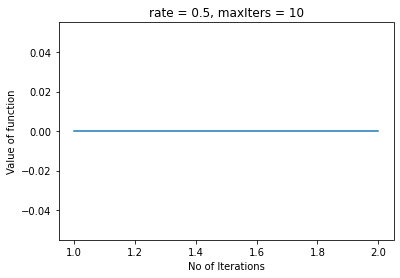

In [ ]:
gradient_descent(0, 0, 0.5, 0.0001, 10, f1, df1x1, df1x2)

###Εφαρμογή του αλγορίθμου Gradient Descent για τη συνάρτηση $f_2$ με τις ζητούμενες αρχικές τιμές

In [ ]:
gradient_descent(0, 0, 0.5, 0.0001, 10, f2, df2x1, df2x2)

Iteration 1:
	(x1, x2) = (120.0, 724.0)
Iteration 2:
	(x1, x2) = (10394480.0, -14988667116.0)
Iteration 3:
	(x1, x2) = (4.493202840083638e+21, 1.3469424333631776e+32)


OverflowError: ignored

Εδώ παρατηρούμε ότι με τις συγκεκριμένες τιμές του learning rate και του μέγιστου αριθμού επαναλήψεων για τη συνάρτηση $f_2$, οδηγούμαστε σε overflow  από την 4η κιόλας επανάληψη.

###Εφαρμογή του αλγορίθμου Gradient Descent για τη συνάρτηση $f_1$ και για διαφορετικές τιμές του learning rate και του μέγιστου αριθμού επαναλήψεων


No of Iterations: 10
Optimal values are (x1, x2) = (0.3658543862249063, 0.5487815793373593)




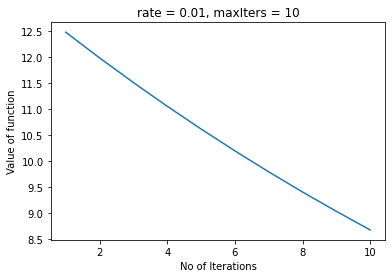

In [ ]:
gradient_descent(0, 0, 0.01, 0.0001, 10, f1, df1x1, df1x2, printOut = 0)


No of Iterations: 50
Optimal values are (x1, x2) = (1.2716606398257657, 1.9074909597386487)




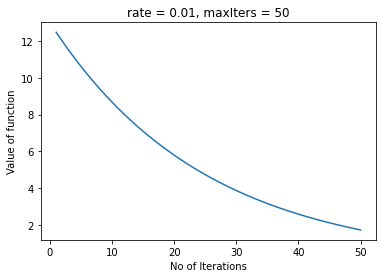

In [ ]:
gradient_descent(0, 0, 0.01, 0.0001, 50, f1, df1x1, df1x2, printOut = 0)


No of Iterations: 100
Optimal values are (x1, x2) = (1.734760888210494, 2.6021413323157403)




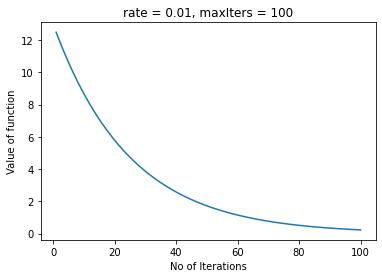

In [ ]:
gradient_descent(0, 0, 0.01, 0.0001, 100, f1, df1x1, df1x2, printOut = 0)


No of Iterations: 10
Optimal values are (x1, x2) = (1.7852516352, 2.6778774528)




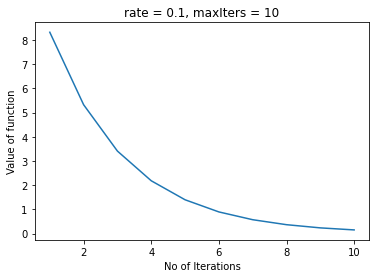

In [ ]:
gradient_descent(0, 0, 0.1, 0.0001, 10, f1, df1x1, df1x2, printOut = 0)


No of Iterations: 40
Optimal values are (x1, x2) = (1.999734154400843, 2.9996012316012646)




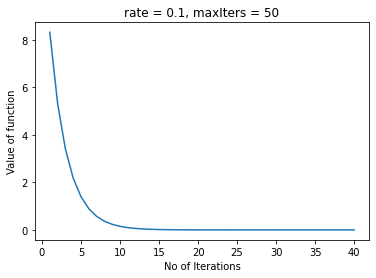

In [ ]:
gradient_descent(0, 0, 0.1, 0.0001, 50, f1, df1x1, df1x2, printOut = 0)


No of Iterations: 10
Optimal values are (x1, x2) = (1.9879067648, 2.9818601472)




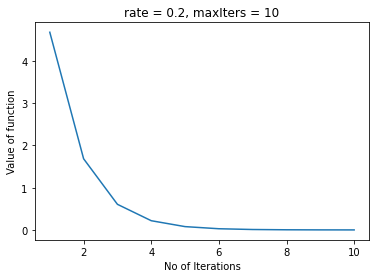

In [ ]:
gradient_descent(0, 0, 0.2, 0.0001, 10, f1, df1x1, df1x2, printOut = 0)


No of Iterations: 20
Optimal values are (x1, x2) = (1.9999268768311989, 2.999890315246798)




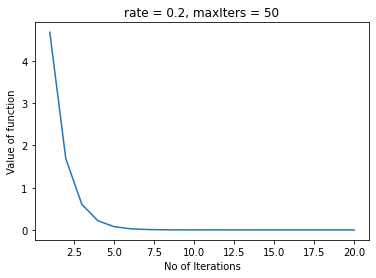

In [ ]:
gradient_descent(0, 0, 0.2, 0.0001, 50, f1, df1x1, df1x2, printOut = 0)


No of Iterations: 8
Optimal values are (x1, x2) = (1.99999488, 2.99999232)




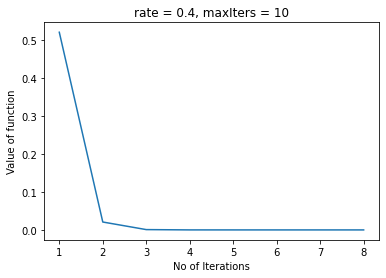

In [ ]:
gradient_descent(0, 0, 0.4, 0.0001, 10, f1, df1x1, df1x2, printOut = 0)


No of Iterations: 8
Optimal values are (x1, x2) = (1.99999488, 2.99999232)




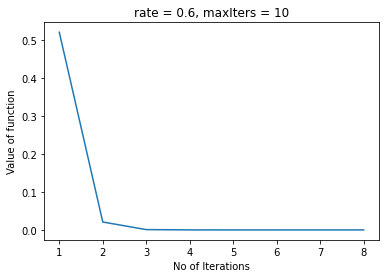

In [ ]:
gradient_descent(0, 0, 0.6, 0.0001, 10, f1, df1x1, df1x2, printOut = 0)


No of Iterations: 10
Optimal values are (x1, x2) = (1.9879067648, 2.9818601472)




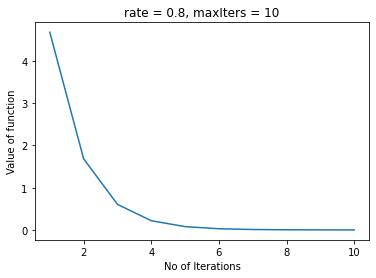

In [ ]:
gradient_descent(0, 0, 0.8, 0.0001, 10, f1, df1x1, df1x2, printOut = 0)


No of Iterations: 23
Optimal values are (x1, x2) = (2.000015794604461, 3.0000236919066916)




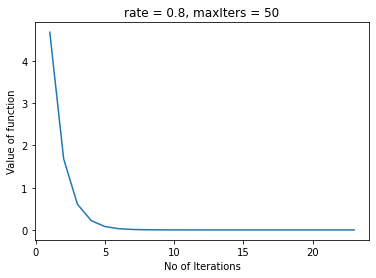

In [ ]:
gradient_descent(0, 0, 0.8, 0.0001, 50, f1, df1x1, df1x2, printOut = 0)


No of Iterations: 10
Optimal values are (x1, x2) = (1.7852516351999999, 2.6778774528)




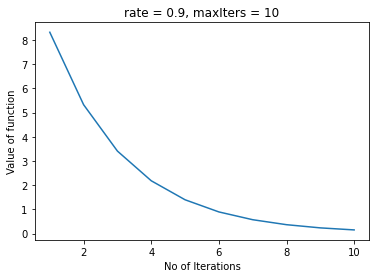

In [ ]:
gradient_descent(0, 0, 0.9, 0.0001, 10, f1, df1x1, df1x2, printOut = 0)


No of Iterations: 50
Optimal values are (x1, x2) = (1.9999714550461458, 2.9999571825692186)




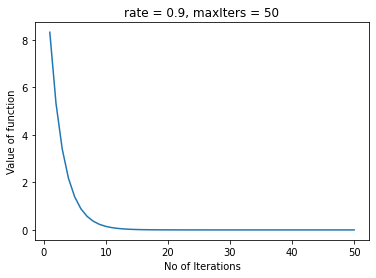

In [ ]:
gradient_descent(0, 0, 0.9, 0.0001, 50, f1, df1x1, df1x2, printOut = 0)

Εδώ παρατηρούμε ότι ο αλγόριθμος χρειάζεται λιγότερες επαναλήψεις για να συγκλίνει σε στάσιμο σημείο για τιμές του learning rate πιο κοντά στο 0.5. Συγκεκριμένα, παρατηρούμε ότι για learning rate ίσο με 0.5 χρειάζεται μόνο 2 επαναλήψεις, για learning rate ίσο με 0.4 ή 0.6 χρειάζεται 8, ενώ για τιμές μεγαλύτερες ή μικρότερες από αυτές, χρειάζονται αρκετές περισσότερες επαναλήψεις.

Για μεγάλες τιμές του learning rate ο αλγόριθμος κάνει μεγαλύτερα "βήματα", άρα επιτυγχάνει συντομότερα την ελαχιστοποίηση της συνάρτησης, αλλά κινδυνεύει να "προσπεράσει" ένα ελάχιστο, ενώ για μικρές τιμές του learning rate μπορεί να χρειαστεί πολλές επαναλήψεις ή να "κολλήσει" σε ένα τοπικό (και όχι ολικό) ελάχιστο της συνάρτησης (https://en.wikipedia.org/wiki/Learning_rate).

###Εφαρμογή του αλγορίθμου Gradient Descent για τη συνάρτηση $f_2$ και για διαφορετικές τιμές του learning rate και του μέγιστου αριθμού επαναλήψεων

In [ ]:
gradient_descent(0, 0, 0.1, 0.0001, 10, f2, df2x1, df2x2, printOut = 0)

OverflowError: ignored

In [ ]:
gradient_descent(0, 0, 0.01, 0.0001, 10, f2, df2x1, df2x2, printOut = 0)

OverflowError: ignored


No of Iterations: 10
Optimal values are (x1, x2) = (0.15952334689180164, 1.2330418783859585)




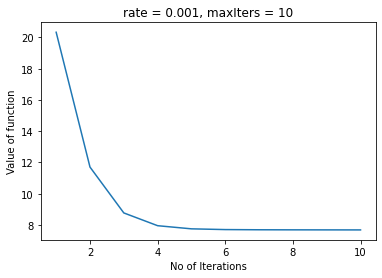

In [ ]:
gradient_descent(0, 0, 0.001, 0.0001, 10, f2, df2x1, df2x2, printOut = 0)


No of Iterations: 100
Optimal values are (x1, x2) = (0.028678382933162917, 1.2701815138836028)




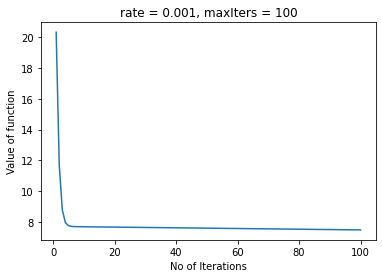

In [ ]:
gradient_descent(0, 0, 0.001, 0.0001, 100, f2, df2x1, df2x2, printOut = 0)


No of Iterations: 1000
Optimal values are (x1, x2) = (-1.3181849771268201, 1.7181261442399087)




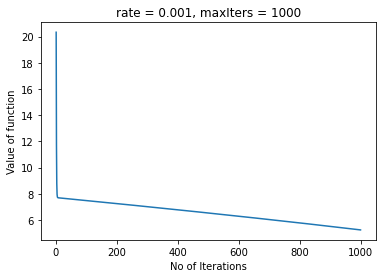

In [ ]:
gradient_descent(0, 0, 0.001, 0.0001, 1000, f2, df2x1, df2x2, printOut = 0)


No of Iterations: 5005
Optimal values are (x1, x2) = (-2.2213876752947344, 3.883804283660589)




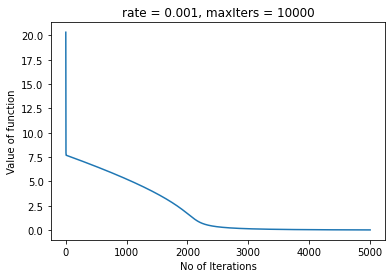

In [ ]:
gradient_descent(0, 0, 0.001, 0.0001, 10000, f2, df2x1, df2x2, printOut = 0)


No of Iterations: 2804
Optimal values are (x1, x2) = (-2.1177172539439675, 3.939963025482221)




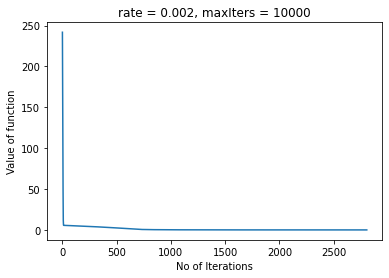

In [ ]:
gradient_descent(0, 0, 0.002, 0.0001, 10000, f2, df2x1, df2x2, printOut = 0)


No of Iterations: 1981
Optimal values are (x1, x2) = (-2.060782919293159, 3.969453806039081)




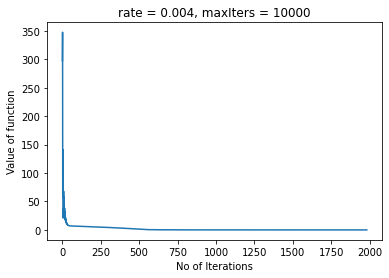

In [ ]:
gradient_descent(0, 0, 0.004, 0.0001, 10000, f2, df2x1, df2x2, printOut = 0)

In [ ]:
gradient_descent(0, 0, 0.005, 0.0001, 10000, f2, df2x1, df2x2, printOut = 0)

OverflowError: ignored

In [ ]:
gradient_descent(0, 0, 0.0045, 0.0001, 10000, f2, df2x1, df2x2, printOut = 0)

OverflowError: ignored


No of Iterations: 1908
Optimal values are (x1, x2) = (-2.0579072463406582, 3.970920126550252)




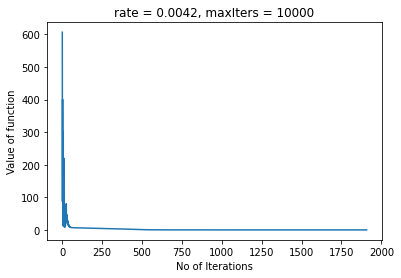

In [ ]:
gradient_descent(0, 0, 0.0042, 0.0001, 10000, f2, df2x1, df2x2, printOut = 0)

Εδώ παρατηρούμε ότι ο αλγόριθμος οδηγείται σε overflow για πολύ μεγάλες τιμές του learning rate, ενώ για πολύ μικρές τιμές, χρειάζεται πάρα πολλές επαναλήψεις.

Συγκεκριμένα, για τιμές του learning rate μεγαλύτερες από 0.005, ο αλγόριθμος οδηγείται σε overflow. Για τιμές πολύ μικρές (πχ 0.0001) χρειάζεται υπερβολικά πολλές επαναλήψεις. Για τιμές του learning rate κοντά στο 0.005 (πχ 0.004) ο αλγόριθμος χρειάζεται περίπου 2000 επαναλήψεις για να καταλήξει σε ένα αποτέλεσμα. Έτσι, όμως, βλέπουμε ότι η συνάρτηση $f_2$ προσεγγίζει το 0 για τιμές $(x_1, x_2)$ που προσεγγίζουν το $(-2,4)$.